# Three Day Break-Out

In [1]:
from SpatialScan.region import *
from SpatialScan.likelihood import *
from SpatialScan.results import *
from SpatialScan.scan import *
from SpatialScan.synthetic import *
from SpatialScan.timeseries import *
from SpatialScan.preprocessing import *

import pandas as pd

## Get Synthetic Data From File

In [2]:
# Set these Variables First
OUTBREAK_LENGTH=3
NORMAL_ANALYSIS_DAYS=3
DAYS_IN_PAST=28

LON_MIN = -0.349749335498348
LON_MAX = -0.25056950567589603
LAT_MIN = 51.45083323706079
LAT_MAX = 51.5408981075881

In [3]:
synth_df = pd.read_csv("../data/synthetic_scoot_april_june.csv", infer_datetime_format=True, parse_dates=[1, 4])
synth_df = synth_df[(synth_df['lon'].between(LON_MIN, LON_MAX)) & (synth_df['lat'].between(LAT_MIN, LAT_MAX))]

In [4]:
total_days_of_required_data = OUTBREAK_LENGTH + NORMAL_ANALYSIS_DAYS + DAYS_IN_PAST

In [5]:
t_min = synth_df['measurement_end_utc'].max() - np.timedelta64(total_days_of_required_data, 'D')
analysis_start = t_min + np.timedelta64(DAYS_IN_PAST, 'D')
synth_df = synth_df[synth_df['measurement_start_utc'] >= t_min].copy()

Now have 34 days worth of data in Ealing

In [6]:
synth_df

,detector_id,measurement_end_utc,lon,lat,measurement_start_utc,n_vehicles_in_interval,rolling_threshold,global_threshold,Num_Anom,Num_Missing
648,N24/002b1,2020-05-02 01:00:00,-0.285622,51.462133,2020-05-02 00:00:00,4,418.103812,308.356339,0.0,10
649,N24/002b1,2020-05-02 02:00:00,-0.285622,51.462133,2020-05-02 01:00:00,7,417.336158,308.356339,0.0,10
650,N24/002b1,2020-05-02 03:00:00,-0.285622,51.462133,2020-05-02 02:00:00,36,416.853280,308.356339,0.0,10
651,N24/002b1,2020-05-02 04:00:00,-0.285622,51.462133,2020-05-02 03:00:00,45,415.446308,308.356339,0.0,10
652,N24/002b1,2020-05-02 05:00:00,-0.285622,51.462133,2020-05-02 04:00:00,25,416.070309,308.356339,0.0,10
...,...,...,...,...,...,...,...,...,...,...
671971,N28/140g1,2020-06-04 20:00:00,-0.276751,51.538122,2020-06-04 19:00:00,404,1339.610887,972.069431,0.0,4
671972,N28/140g1,2020-06-04 21:00:00,-0.276751,51.538122,2020-06-04 20:00:00,255,1337.103390,972.069431,0.0,4
671973,N28/140g1,2020-06-04 22:00:00,-0.276751,51.538122,2020-06-04 21:00:00,26,1340.919715,972.069431,0.0,4
671974,N28/140g1,2020-06-04 23:00:00,-0.276751,51.538122,2020-06-04 22:00:00,126,1343.364932,972.069431,0.0,4


## Simulate an Outbreak which lasts for the last `OUTBREAK_LENGTH` days

Simulate an outbreak for the last 3

In [7]:
outbreak_df, outbreak_detectors, outbreak_start = simulate_outbreak(synth_df, severity=50, k_min=1, k_max=75, outbreak_duration=OUTBREAK_LENGTH)

Outbreak centred at (-0.295034837756049, 51.5321338356957) affecting 50 detectors
['N27/130b1' 'N27/101q1' 'N27/102b1' 'N27/101c1' 'N27/101a1' 'N27/101a2'
 'N27/102a1' 'N27/101b2' 'N27/101b1' 'N27/102x2' 'N27/100c1' 'N27/100x1'
 'N27/004b1' 'N27/100b1' 'N27/100s1' 'N27/004a1' 'N27/130a1' 'N27/130a2'
 'N27/004x2' 'N27/102c2' 'N27/004f3' 'N27/004g1' 'N27/004g2' 'N27/004f1'
 'N27/004f2' 'N27/010d1' 'N27/093e1' 'N27/010c1' 'N27/245b1' 'N27/011a1'
 'N27/018b1' 'N27/247x1' 'N27/169a1' 'N27/018e1' 'N28/140g1' 'N27/247a1'
 'N27/071a1' 'N27/018f1' 'N27/247f1' 'N27/247e1' 'N27/090b1' 'N27/169b1'
 'N27/011d1' 'N27/093g1' 'N27/018d1' 'N27/169c1' 'N27/219b1' 'N27/219b2'
 'N27/044c1' 'N27/011h1']
Start of outbreak: 2020-06-02 00:00:00


Text(2020-05-30 00:00:00, 100, 'Analysis Begins')

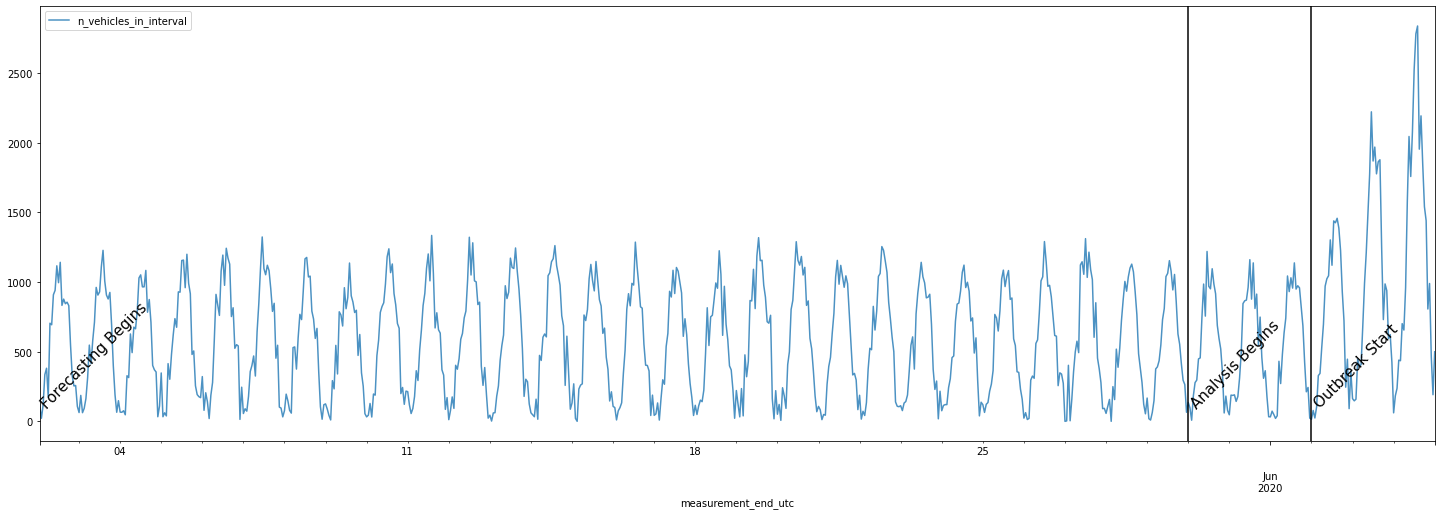

In [8]:
outbreak_df[outbreak_df['detector_id'] == 'N27/011a1'].plot(x='measurement_end_utc', y='n_vehicles_in_interval', figsize=(25, 8), alpha=0.8)
plt.axvline(x=outbreak_start, c='k')
plt.text(outbreak_start,100,'Outbreak Start',rotation=45, size=15)
plt.axvline(x=t_min, c='k')
plt.text(t_min,100,'Forecasting Begins',rotation=45, size=15)
plt.axvline(x=analysis_start, c='k')
plt.text(analysis_start,100,'Analysis Begins',rotation=45, size=15)

Run Scans over the 34 - 28 = 6 days, looking one day back each time, using the method prescribed.

Total number of days in dataframe:  34
Producing forecasts and scans for 5 days in total.


Analysis day: 2020-06-01 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-02 00:00:00 to 2020-06-01 00:00:00.
Using data from 2020-05-02 00:00:00 to 2020-05-30 00:00:00, to forecast counts between 2020-05-30 00:00:00 and 2020-06-01 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


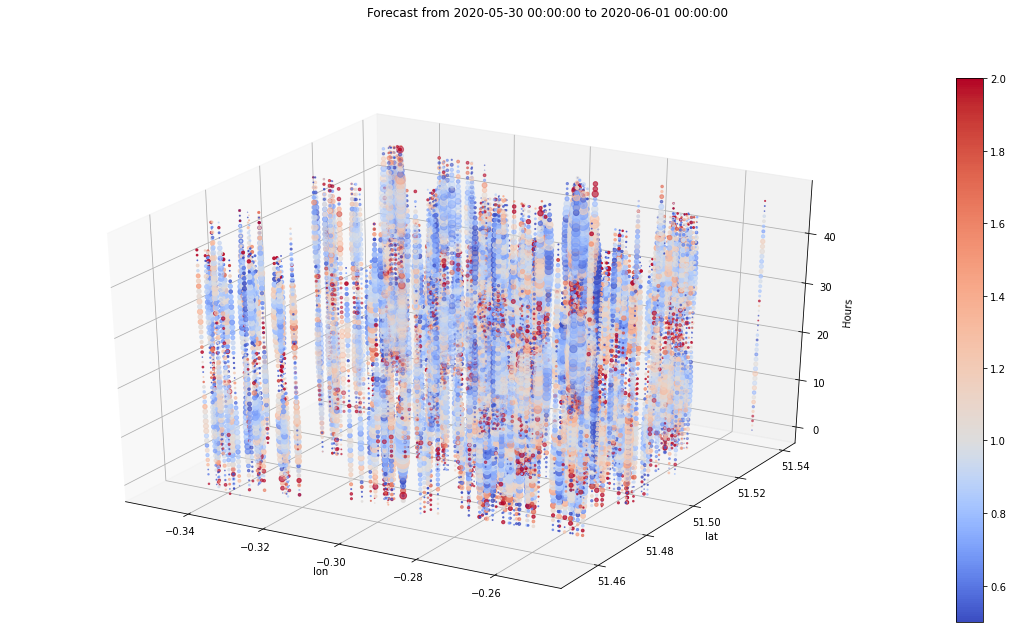

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 8.24 seconds
Search spatial regions with t_min = 2020-05-30 00:00:00 and t_max = 2020-06-01 00:00:00
32448 space-time regions searched in 84.20 seconds
Total run time: 92.44 seconds

Analysis day: 2020-06-02 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-02 00:00:00 to 2020-06-02 00:00:00.
Using data from 2020-05-03 00:00:00 to 2020-05-31 00:00:00, to forecast counts between 2020-05-31 00:00:00 and 2020-06-02 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


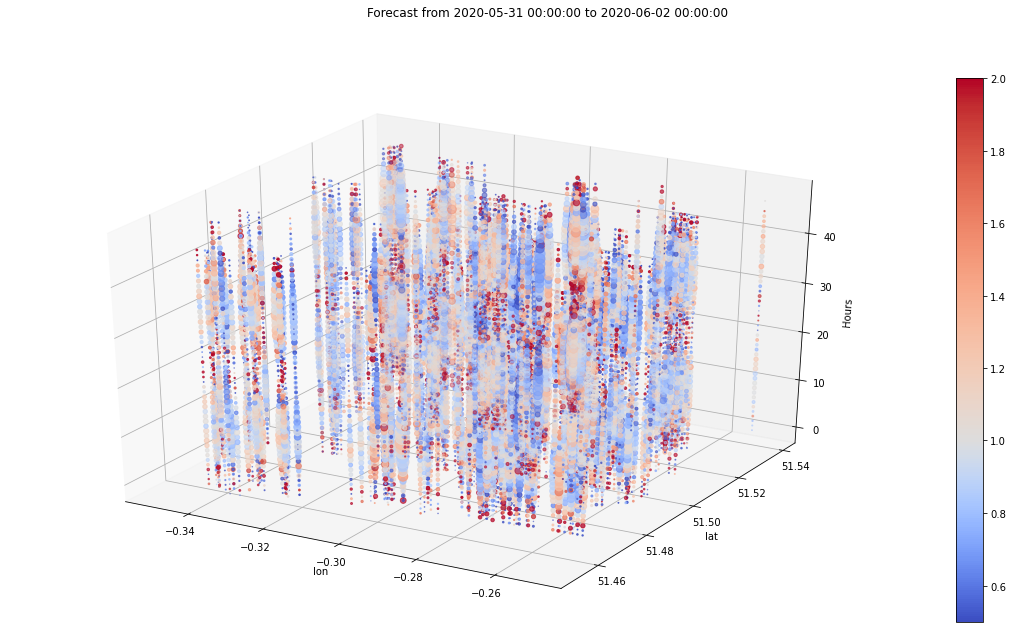

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 7.67 seconds
Search spatial regions with t_min = 2020-05-31 00:00:00 and t_max = 2020-06-02 00:00:00
32448 space-time regions searched in 88.85 seconds
Total run time: 96.52 seconds

Analysis day: 2020-06-03 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-02 00:00:00 to 2020-06-03 00:00:00.
Using data from 2020-05-04 00:00:00 to 2020-06-01 00:00:00, to forecast counts between 2020-06-01 00:00:00 and 2020-06-03 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


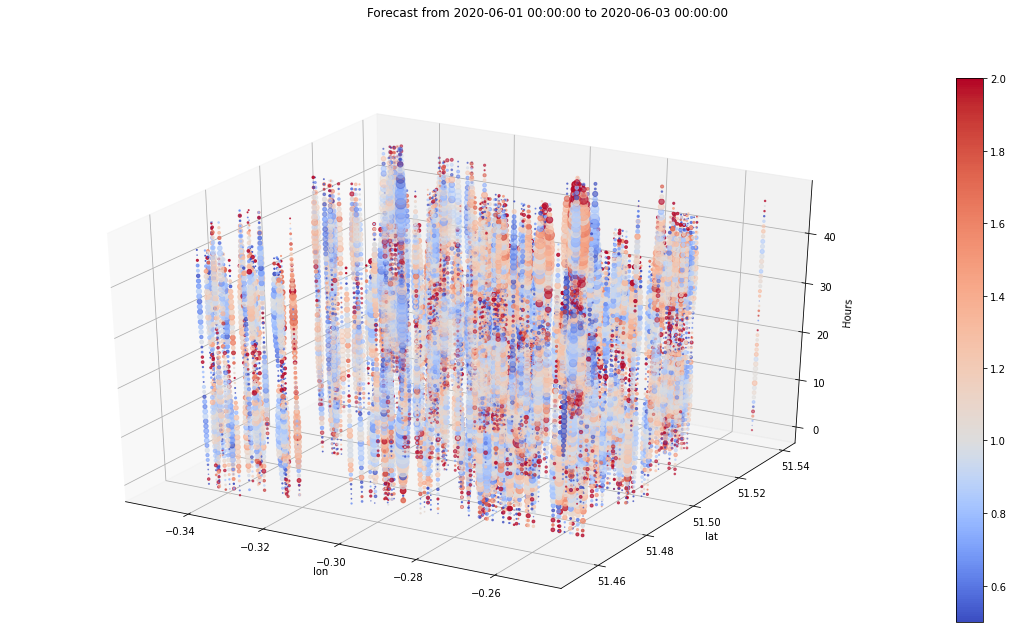

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 7.78 seconds
Search spatial regions with t_min = 2020-06-01 00:00:00 and t_max = 2020-06-03 00:00:00
32448 space-time regions searched in 89.10 seconds
Total run time: 96.88 seconds

Analysis day: 2020-06-04 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-02 00:00:00 to 2020-06-04 00:00:00.
Using data from 2020-05-05 00:00:00 to 2020-06-02 00:00:00, to forecast counts between 2020-06-02 00:00:00 and 2020-06-04 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


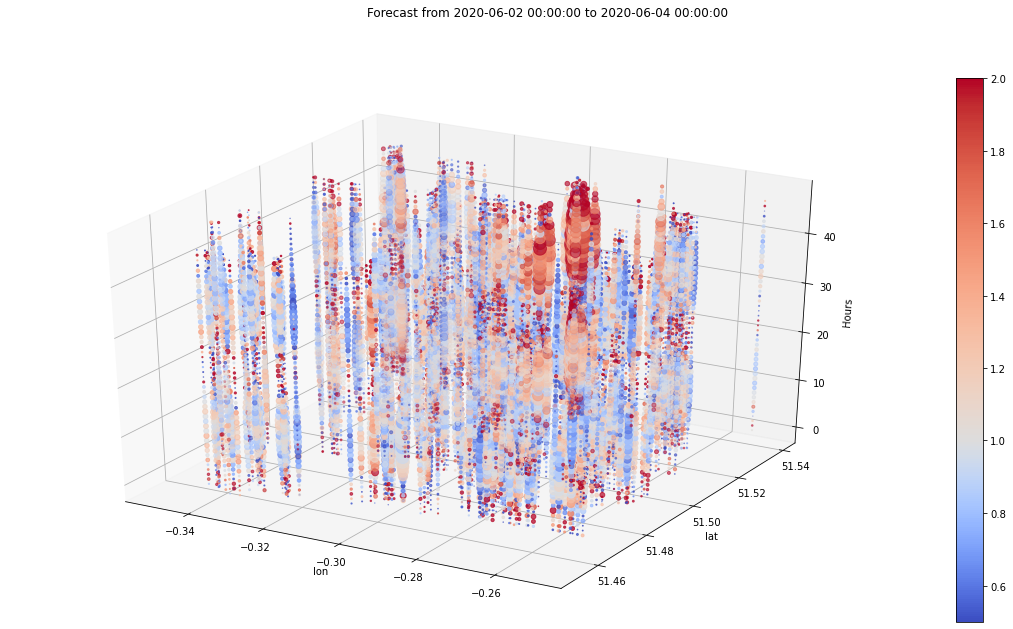

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 8.78 seconds
Search spatial regions with t_min = 2020-06-02 00:00:00 and t_max = 2020-06-04 00:00:00
32448 space-time regions searched in 88.10 seconds
Total run time: 96.89 seconds

Analysis day: 2020-06-05 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-02 00:00:00 to 2020-06-05 00:00:00.
Using data from 2020-05-06 00:00:00 to 2020-06-03 00:00:00, to forecast counts between 2020-06-03 00:00:00 and 2020-06-05 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


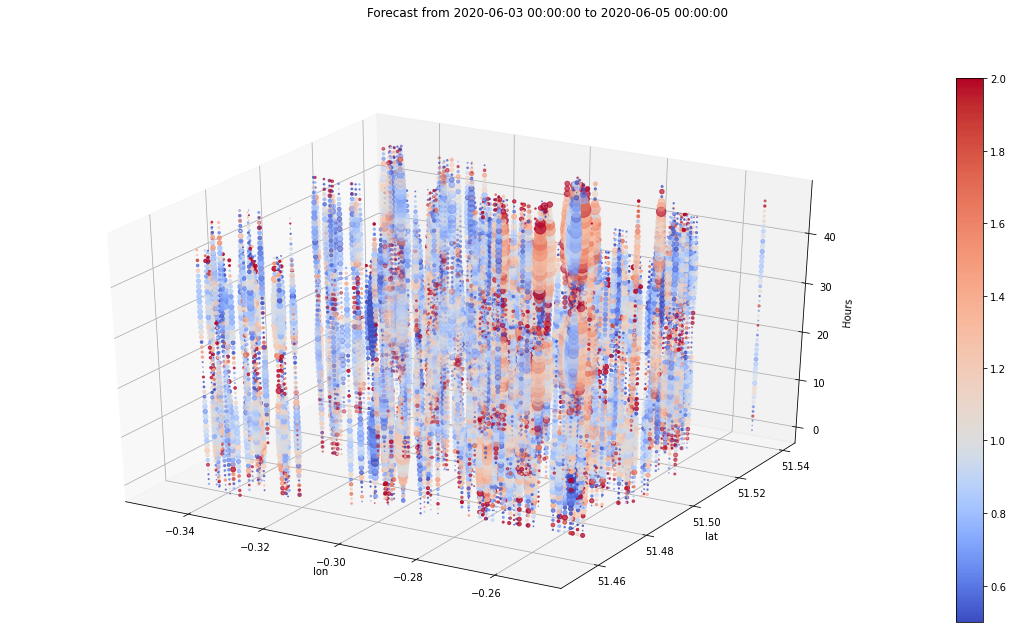

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 8.22 seconds
Search spatial regions with t_min = 2020-06-03 00:00:00 and t_max = 2020-06-05 00:00:00
32448 space-time regions searched in 93.47 seconds
Total run time: 101.69 seconds


In [9]:
database_result, highest_regions = results_builder(outbreak_df, days_in_past=28, days_in_future=2, method='HW', grid_partition=8, scan_type='normal')

In [10]:
check = database_result[database_result['point_id'] == 0]
end_time = check.iloc[0]['end_time_utc']
check[check['end_time_utc'] == end_time]

,start_time_utc,end_time_utc,point_id,x_min,x_max,y_min,y_max,observed_count,forecasted_count,av_lhd_score_basic,av_lhd_score_eps_000,av_lhd_score_eps_025,av_lhd_score_eps_050,av_lhd_score_eps_075,av_lhd_score_eps_100
0,2020-05-30 00:00:00,2020-06-01,0,-0.349749,-0.337352,51.451503,51.462464,4.542013,5.004652,1.000000,4.788690e-05,-0.006263,-0.022651,-0.045710,-0.073356
64,2020-05-30 01:00:00,2020-06-01,0,-0.349749,-0.337352,51.451503,51.462464,4.526856,4.989601,1.000000,4.547619e-05,-0.006266,-0.022628,-0.045642,-0.073231
128,2020-05-30 02:00:00,2020-06-01,0,-0.349749,-0.337352,51.451503,51.462464,4.511509,4.974469,1.000000,4.306987e-05,-0.006269,-0.022606,-0.045576,-0.073107
192,2020-05-30 03:00:00,2020-06-01,0,-0.349749,-0.337352,51.451503,51.462464,4.495373,4.954904,1.000000,4.537612e-05,-0.006226,-0.022489,-0.045365,-0.072791
256,2020-05-30 04:00:00,2020-06-01,0,-0.349749,-0.337352,51.451503,51.462464,4.462735,4.926349,1.000000,3.981081e-05,-0.006286,-0.022543,-0.045370,-0.072719
320,2020-05-30 05:00:00,2020-06-01,0,-0.349749,-0.337352,51.451503,51.462464,4.416028,4.878064,1.000000,3.743415e-05,-0.006273,-0.022424,-0.045087,-0.072234
384,2020-05-30 06:00:00,2020-06-01,0,-0.349749,-0.337352,51.451503,51.462464,4.346557,4.808177,1.000000,2.829667e-05,-0.006275,-0.022293,-0.044735,-0.071605
448,2020-05-30 07:00:00,2020-06-01,0,-0.349749,-0.337352,51.451503,51.462464,4.255312,4.709320,1.000000,2.517181e-05,-0.006185,-0.021933,-0.043992,-0.070406
512,2020-05-30 08:00:00,2020-06-01,0,-0.349749,-0.337352,51.451503,51.462464,4.140393,4.582690,1.000000,2.482428e-05,-0.006041,-0.021418,-0.042964,-0.068771
576,2020-05-30 09:00:00,2020-06-01,0,-0.349749,-0.337352,51.451503,51.462464,4.003231,4.433582,1.000000,2.327767e-05,-0.005898,-0.020856,-0.041810,-0.066914


In [14]:
highest_regions

,x_min,x_max,y_min,y_max,t_min,t_max,l_score_basic,l_score_000,l_score_025,l_score_050,l_score_075,l_score_100,day
0,-0.349749,-0.337352,51.528227,51.539188,2020-05-31 23:00:00,2020-06-01,1.000159,0.000215,0.000106,0.000042,0.000010,2.153046e-09,2020-06-01
1,-0.287762,-0.262967,51.451503,51.462464,2020-05-31 04:00:00,2020-06-02,1.000217,0.000327,0.000056,-0.000003,-0.000101,-3.093883e-04,2020-06-02
2,-0.300159,-0.287762,51.506306,51.539188,2020-06-02 07:00:00,2020-06-03,1.003316,0.004502,-0.000518,-0.010111,-0.028751,-5.374460e-02,2020-06-03
3,-0.300159,-0.287762,51.495345,51.539188,2020-06-02 16:00:00,2020-06-04,1.036836,0.040434,0.008235,-0.000018,-0.007740,-2.663253e-02,2020-06-04
4,-0.300159,-0.275364,51.506306,51.539188,2020-06-03 05:00:00,2020-06-05,1.004794,0.019442,-0.000144,-0.019748,-0.063730,-1.236745e-01,2020-06-05


['2020-05-30T00:00:00.000000000' '2020-05-30T01:00:00.000000000'
 '2020-05-30T02:00:00.000000000' '2020-05-30T03:00:00.000000000'
 '2020-05-30T04:00:00.000000000' '2020-05-30T05:00:00.000000000'
 '2020-05-30T06:00:00.000000000' '2020-05-30T07:00:00.000000000'
 '2020-05-30T08:00:00.000000000' '2020-05-30T09:00:00.000000000'
 '2020-05-30T10:00:00.000000000' '2020-05-30T11:00:00.000000000'
 '2020-05-30T12:00:00.000000000' '2020-05-30T13:00:00.000000000'
 '2020-05-30T14:00:00.000000000' '2020-05-30T15:00:00.000000000'
 '2020-05-30T16:00:00.000000000' '2020-05-30T17:00:00.000000000'
 '2020-05-30T18:00:00.000000000' '2020-05-30T19:00:00.000000000'
 '2020-05-30T20:00:00.000000000' '2020-05-30T21:00:00.000000000'
 '2020-05-30T22:00:00.000000000' '2020-05-30T23:00:00.000000000'
 '2020-05-31T00:00:00.000000000' '2020-05-31T01:00:00.000000000'
 '2020-05-31T02:00:00.000000000' '2020-05-31T03:00:00.000000000'
 '2020-05-31T04:00:00.000000000' '2020-05-31T05:00:00.000000000'
 '2020-05-31T06:00:00.000

ValueError: cannot reshape array of size 128 into shape (8,8)